In [2]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sangeetaellankovan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#Store the data into the df variable
#Get in some data
url='~/Desktop/BAP Data.csv'

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

df = pd.read_csv(url)

# Keeping only the neccessary columns
df = df[['Comments']]
print(df)
#df.head(10)

                                              Comments
0                                  Pleasant Beneficial
1    Felt a bit of stress as I had to meet deadline...
2    I am able to multi task and complete the requi...
3    its good if you don't have work commitments Ok...
4                 Has been alright so far A good start
..                                                 ...
122  The NUS ISS courses are structured in a way th...
123  Have to work on project during break, after co...
124  It has been pleasant so far. Both rarely inter...
125  Not very well as I had to pull out last minute...
126  Poor experience. Not much difference between t...

[127 rows x 1 columns]


In [4]:
df['Comments']=df['Comments'].apply(str)


In [5]:
import re
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower() #lowercase
   # df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    #remove.............. (#re sub / search/ ..)
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"[^\w\s]", "", elem))  


    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return df

In [6]:
#read about dataframes ! TABLEAU !! 
#data_clean : new dataframe
df_clean = clean_text(df, 'Comments', 'Comments_clean')
df_clean.head()

,Comments,Comments_clean
0,Pleasant Beneficial,pleasant beneficial
1,Felt a bit of stress as I had to meet deadline...,felt a bit of stress as i had to meet deadline...
2,I am able to multi task and complete the requi...,i am able to multi task and complete the requi...
3,its good if you don't have work commitments Ok...,its good if you dont have work commitments oka...
4,Has been alright so far A good start,has been alright so far a good start


In [7]:
stop = stopwords.words('english')
stop #the list of the stopwords ! 


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
#remove stop words

df_clean['text_clean'] = df_clean['Comments_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean.head()

,Comments,Comments_clean,text_clean
0,Pleasant Beneficial,pleasant beneficial,pleasant beneficial
1,Felt a bit of stress as I had to meet deadline...,felt a bit of stress as i had to meet deadline...,felt bit stress meet deadlines project challen...
2,I am able to multi task and complete the requi...,i am able to multi task and complete the requi...,able multi task complete requirements successf...
3,its good if you don't have work commitments Ok...,its good if you dont have work commitments oka...,good dont work commitments okay entry point
4,Has been alright so far A good start,has been alright so far a good start,alright far good start


In [9]:
#tokenize
df_clean['text_tokens'] = df_clean['text_clean'].apply(lambda x: word_tokenize(x))
df_clean.head()

,Comments,Comments_clean,text_clean,text_tokens
0,Pleasant Beneficial,pleasant beneficial,pleasant beneficial,"[pleasant, beneficial]"
1,Felt a bit of stress as I had to meet deadline...,felt a bit of stress as i had to meet deadline...,felt bit stress meet deadlines project challen...,"[felt, bit, stress, meet, deadlines, project, ..."
2,I am able to multi task and complete the requi...,i am able to multi task and complete the requi...,able multi task complete requirements successf...,"[able, multi, task, complete, requirements, su..."
3,its good if you don't have work commitments Ok...,its good if you dont have work commitments oka...,good dont work commitments okay entry point,"[good, dont, work, commitments, okay, entry, p..."
4,Has been alright so far A good start,has been alright so far a good start,alright far good start,"[alright, far, good, start]"


# stemming #PorterStemmer 
#need stemming? Stemming or lemmatization ?
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text
df_clean['text_clean_tokens'] = df_clean['text_tokens'].apply(lambda x: word_stemmer(x))
df_clean.head()

#print(df_clean)


In [10]:
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
df_clean['text_clean_tokens'] = df_clean['text_tokens'].apply(lambda x: word_lemmatizer(x))
#df_clean.head()
print(df_clean)


                                              Comments  \
0                                  Pleasant Beneficial   
1    Felt a bit of stress as I had to meet deadline...   
2    I am able to multi task and complete the requi...   
3    its good if you don't have work commitments Ok...   
4                 Has been alright so far A good start   
..                                                 ...   
122  The NUS ISS courses are structured in a way th...   
123  Have to work on project during break, after co...   
124  It has been pleasant so far. Both rarely inter...   
125  Not very well as I had to pull out last minute...   
126  Poor experience. Not much difference between t...   

                                        Comments_clean  \
0                                  pleasant beneficial   
1    felt a bit of stress as i had to meet deadline...   
2    i am able to multi task and complete the requi...   
3    its good if you dont have work commitments oka...   
4            

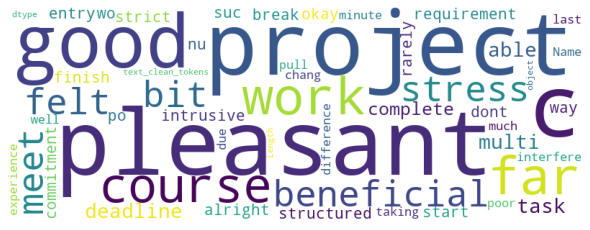

In [11]:
text = df['text_clean_tokens']

wordcloud = WordCloud(width = 800, height = 300, 
                background_color ='white', 
                min_font_size = 10).generate(str(text)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [12]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#if score  0.05 then Positive. if score <= - 0.05, then Negative

In [14]:
dfV = pd.read_csv('~/Desktop/BAP Data.csv')
dfV.head()

,ID,gender,age_group,education,school,major,department,work_hours,work_hours_satisfy,tasks_satisfy,...,job_satisfy,referral_likelihood,no_iss_mods,withdrawal,no_non_iss_mods,no_hours_ot,grant_stop,graduate_likelihood,Comments,no_days_since_joined
0,1,Male,25-30 years old,Bachelor's Degree,SIT,Information Security,BAS,40-44 hours,Yes,Yes,...,I am satisfied with my job,9,1-2,No,1-5,0,No,8,Pleasant Beneficial,68
1,2,Male,25-30 years old,Bachelor's Degree,SIM,Computer Science,BAS,40-44 hours,Yes,Yes,...,I am satisfied with my job,10,1-2,No,1-5,1,No,8,Felt a bit of stress as I had to meet deadline...,131
2,3,Male,21-24 years old,Bachelor's Degree,University of Newscastle,Information Technology,BAS,More than 54 hours,Yes,Yes,...,I am fairly satisfied with my job,7,1-2,No,1-5,6,No,8,I am able to multi task and complete the requi...,743
3,4,Male,25-30 years old,Bachelor's Degree,SUTD,Information Systems,BAS,45-49 hours,No,Yes,...,I am fairly satisfied with my job,2,1-2,No,1-5,0,No,1,its good if you don't have work commitments Ok...,187
4,5,Male,25-30 years old,Bachelor's Degree,NUS,Computer Engineering,BAS,40-44 hours,Yes,Yes,...,I am satisfied with my job,8,1-2,No,1-5,2,No,7,Has been alright so far A good start,96


In [19]:
analyzer = SentimentIntensityAnalyzer()
dfV['Compound'] = dfV['Comments'].astype(str).apply(lambda x:analyzer.polarity_scores(x)['compound'])

#pd.concat([df.drop(['Rating'], axis=1), df['Rating'].apply(pd.Series)], axis=1)
dfV.head()

,ID,gender,age_group,education,school,major,department,work_hours,work_hours_satisfy,tasks_satisfy,...,referral_likelihood,no_iss_mods,withdrawal,no_non_iss_mods,no_hours_ot,grant_stop,graduate_likelihood,Comments,no_days_since_joined,Compound
0,1,Male,25-30 years old,Bachelor's Degree,SIT,Information Security,BAS,40-44 hours,Yes,Yes,...,9,1-2,No,1-5,0,No,8,Pleasant Beneficial,68,0.7351
1,2,Male,25-30 years old,Bachelor's Degree,SIM,Computer Science,BAS,40-44 hours,Yes,Yes,...,10,1-2,No,1-5,1,No,8,Felt a bit of stress as I had to meet deadline...,131,0.1027
2,3,Male,21-24 years old,Bachelor's Degree,University of Newscastle,Information Technology,BAS,More than 54 hours,Yes,Yes,...,7,1-2,No,1-5,6,No,8,I am able to multi task and complete the requi...,743,0.7096
3,4,Male,25-30 years old,Bachelor's Degree,SUTD,Information Systems,BAS,45-49 hours,No,Yes,...,2,1-2,No,1-5,0,No,1,its good if you don't have work commitments Ok...,187,0.5315
4,5,Male,25-30 years old,Bachelor's Degree,NUS,Computer Engineering,BAS,40-44 hours,Yes,Yes,...,8,1-2,No,1-5,2,No,7,Has been alright so far A good start,96,0.6344


##### print(dfV)

In [16]:
dfN = dfV.drop(columns=['Comments'])

In [17]:
dfN.head(10)

,ID,gender,age_group,education,school,major,department,work_hours,work_hours_satisfy,tasks_satisfy,...,job_satisfy,referral_likelihood,no_iss_mods,withdrawal,no_non_iss_mods,no_hours_ot,grant_stop,graduate_likelihood,no_days_since_joined,Compound
0,1,Male,25-30 years old,Bachelor's Degree,SIT,Information Security,BAS,40-44 hours,Yes,Yes,...,I am satisfied with my job,9,1-2,No,1-5,0,No,8,68,0.7351
1,2,Male,25-30 years old,Bachelor's Degree,SIM,Computer Science,BAS,40-44 hours,Yes,Yes,...,I am satisfied with my job,10,1-2,No,1-5,1,No,8,131,0.1027
2,3,Male,21-24 years old,Bachelor's Degree,University of Newscastle,Information Technology,BAS,More than 54 hours,Yes,Yes,...,I am fairly satisfied with my job,7,1-2,No,1-5,6,No,8,743,0.7096
3,4,Male,25-30 years old,Bachelor's Degree,SUTD,Information Systems,BAS,45-49 hours,No,Yes,...,I am fairly satisfied with my job,2,1-2,No,1-5,0,No,1,187,0.5315
4,5,Male,25-30 years old,Bachelor's Degree,NUS,Computer Engineering,BAS,40-44 hours,Yes,Yes,...,I am satisfied with my job,8,1-2,No,1-5,2,No,7,96,0.6344
5,6,Female,25-30 years old,Bachelor's Degree,SUTD,Information Systems,BAS,40-44 hours,Yes,No,...,I am fairly satisfied with my job,8,3-4,No,None,0,No,6,530,0.6705
6,7,Male,31-34 years old,Bachelor's Degree,SIT,Information Systems,BAS,40-44 hours,Yes,Yes,...,I am satisfied with my job,9,More than 4,No,None,0,Yes,7,642,0.1531
7,8,Male,25-30 years old,Bachelor's Degree,NTU,Computer Science,BAS,45-49 hours,Yes,Yes,...,I am satisfied with my job,8,3-4,No,1-5,2,Yes,5,796,0.6808
8,9,Male,25-30 years old,Bachelor's Degree,SIM,Information Systems,BAS,40-44 hours,Yes,Yes,...,I am fairly satisfied with my job,8,3-4,No,1-5,3,No,4,586,-0.7380
9,10,Male,25-30 years old,Bachelor's Degree,DigiPen Institute of Technology Singapore,Computer Science,BAS,40-44 hours,Yes,Yes,...,I am fairly satisfied with my job,8,1-2,No,1-5,0,No,8,159,0.8126


In [ ]:
positive sentiment: compound score >= 0.05
neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
negative sentiment: compound score <= -0.05

In [ ]:
        
for i, row in df.iterrows():
    ifor_val = something
    if <condition>:
        ifor_val = something_else
    df.set_value(i,'ifor',ifor_val)

In [32]:
a = 0
b = 0
c = 0


for index, row in dfV.iterrows():
    if dfV["Compound"] >=  0.5:
        a=a+1
    if (dfV["Compound"] > -0.5) & (dfV["Compound"] < 0.5):
        b=b+1
    if dfV["Compound"] <=  -0.5:
        c=c+1


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

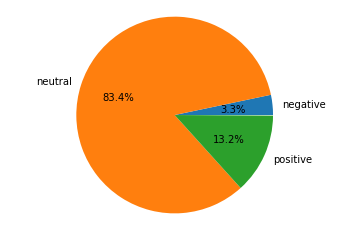

In [30]:
ss = {'neg': 0.033, 'neu': 0.834, 'pos': 0.132, 'compound': 0.9936}
labels = ['negative', 'neutral', 'positive']
sizes  = [ss['neg'], ss['neu'], ss['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%') # autopct='%1.1f%%' gives you percentages printed in every slice.
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.show()